# Project 5: ValueInvestor - Russia Sberbank Rossii PAO (SBER)

## Importing Modules

In [776]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # this will take away the red dialog boxes in the output terminal

## Reading Data

In [777]:
Data = pd.read_csv('Project 5 Data.csv', index_col = 'Date', parse_dates=True) # parse_dates = True will convert the indexed 'Date' column to datetimes types.
Data = Data.sort_index()
Data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Apr 01, 2020",184.78,183.2,185.47,182,76.83M,-1.30%
"Apr 02, 2020",186.95,188.3,189.9,182,125.64M,1.17%
"Apr 03, 2020",185.64,186.6,187.49,184.28,92.86M,-0.70%
"Apr 06, 2020",190.7,187.52,192.02,186.42,77.86M,2.73%
"Apr 07, 2020",197.63,193.02,200.54,193.02,136.42M,3.63%


In [778]:
Data.info() # Need to convert Columns into float data types and get rid of bottom row and convert index to datatime object.

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Apr 01, 2020 to Sep 30, 2020
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     312 non-null    object
 1   Open      312 non-null    object
 2   High      312 non-null    object
 3   Low       312 non-null    object
 4   Vol.      311 non-null    object
 5   Change %  311 non-null    object
dtypes: object(6)
memory usage: 17.1+ KB


In [779]:
Data.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Sep 24, 2020",228.17,227.63,231.1,225.75,82.00M,-0.14%
"Sep 25, 2020",228.24,229,229.3,226.25,60.25M,0.03%
"Sep 28, 2020",228.63,228.79,229.55,227.35,64.52M,0.17%
"Sep 29, 2020",225.48,228.88,228.88,223.1,90.42M,-1.38%
"Sep 30, 2020",229.14,224.5,230.75,223.25,78.60M,1.62%


## Removing Irrelevant Columns

In [780]:
Extracted_Data = Data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1) # Focusing only on Price
Extracted_Data = Extracted_Data.sort_index()
Extracted_Data.head()

,Price
Date,
"Apr 01, 2020",184.78
"Apr 02, 2020",186.95
"Apr 03, 2020",185.64
"Apr 06, 2020",190.7
"Apr 07, 2020",197.63


In [781]:
Extracted_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Apr 01, 2020 to Sep 30, 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   312 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


## Cleaning Data

In [782]:
Extracted_Data[Extracted_Data['Price'] == 'Lowest: 172.15'] # Here's the problem.  This row needs to be deleted

,Price
Date,
Highest: 296.07,Lowest: 172.15


In [783]:
Extracted_Data = Extracted_Data.drop(Extracted_Data[Extracted_Data['Price'] == 'Lowest: 172.15'].index) # Problem row removed

In [784]:
Extracted_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, Apr 01, 2020 to Sep 30, 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   311 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [785]:
Extracted_Data['Price'] = Extracted_Data['Price'].astype("float64") # Now All Values In floats.

## Visualizing Data

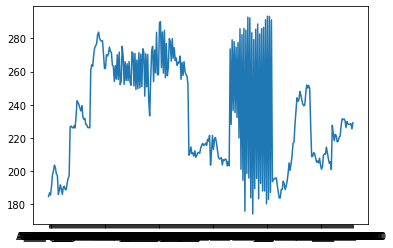

In [786]:
plt.plot(Extracted_Data) # Problem with X-Axis
plt.show()

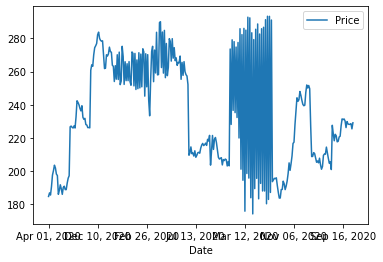

In [787]:
fig, ax = plt.subplots() # Creating the axis
Extracted_Data.plot(ax=ax)
plt.show()

Since there's a lot of data, visualizing this data above despite adjusting the size of the images is not very presentable so a different approach needed to be employed.

In [788]:
Extracted_Data.index = pd.to_datetime(Extracted_Data.index) # Converting Index to datatime object

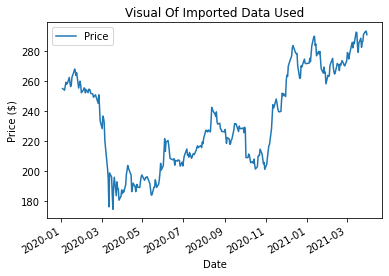

In [789]:
fig, ax = plt.subplots() # Creating the axis
Extracted_Data.plot(ax=ax)
plt.title('Visual Of Imported Data Used')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')
plt.savefig('Picture 1')
plt.show() # It worked

Here, the data is a bit more presentable.

## Splitting Up Data Into Train And Test

In [790]:
train = Extracted_Data.loc[:'Jan 1, 2021'].sort_index() # this doesnt work because data is backwards.  Need to reverse order of dates so that 1st entry is earliest one.
test = Extracted_Data.loc['Jan 1, 2021':].sort_index() # used .sort_index() so that the data arranged in chronological order.

In [791]:
test.head()

,Price
Date,
2021-01-04,272.00
2021-01-05,275.20
2021-01-06,272.93
2021-01-08,283.64
2021-01-11,289.49


In [792]:
test.tail()

,Price
Date,
2021-03-25,286.66
2021-03-26,291.22
2021-03-29,293.30
2021-03-30,293.25
2021-03-31,291.02


In [793]:
train.head()

,Price
Date,
2020-01-03,255.00
2020-01-06,253.90
2020-01-08,259.15
2020-01-09,257.99
2020-01-10,258.19


In [794]:
train.tail()

,Price
Date,
2020-12-24,269.32
2020-12-25,270.64
2020-12-28,274.70
2020-12-29,272.00
2020-12-30,271.65


## Final Visual of Train And Test Data

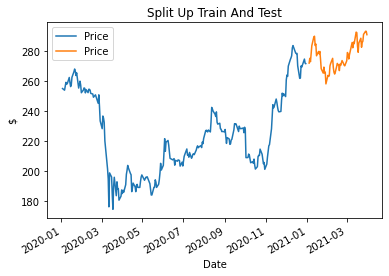

In [795]:
fig, ax = plt.subplots()
train.plot(ax=ax, label = 'train')
test.plot(ax=ax, label = 'test')
plt.title('Split Up Train And Test')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.savefig('Split Up Train And Test')
plt.show() # Test data in orange and train data in blue

After splitting up the training and test data a clearer visual is presented.  There is a small gap between the training and testing data.  This is because holidays and weekends are not recorded.  This will be further verified below for a clearer observation.

# Data Stationarity

The data must be stationary first before timeseries modelling:
1. No trend
2. Variance is constant
3. Autocorrelation is constant

# The Dickey-Fuller Test For Stationarity

In [796]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(Extracted_Data)

In [797]:
print(results)

(-2.585984286996599, 0.0959287683450642, 3, 307, {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}, 2311.6926208376003)


0th element above is the adf statistic or test statistic. The more negative this number is, the more likely the data is stationary. The 1st element is the p-value. If p-value is below 0.05, then null hypothesis (the data is not stationary) is rejected.

### First Order Difference

In [798]:
Extracted_Data_Stationary_diff = train.diff().dropna() # Use dropna to get rid of first NaN value and take the first difference

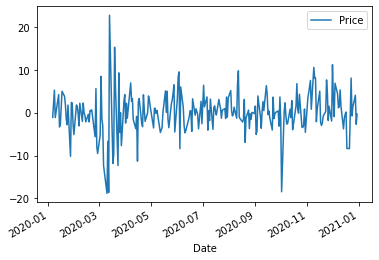

In [799]:
fig, ax = plt.subplots()
Extracted_Data_Stationary_diff.plot(ax=ax)
plt.show() # Taking the first difference makes the data stationary

### Second Order Difference

In [800]:
Extracted_Data_Stationary_diff2 = train.diff().diff().dropna() # Use dropna to get rid of first NaN value

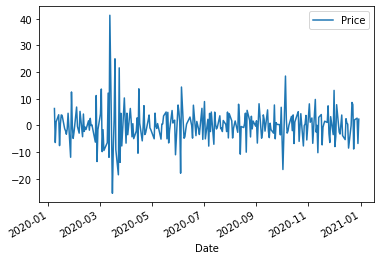

In [801]:
fig, ax = plt.subplots()
Extracted_Data_Stationary_diff2.plot(ax=ax)
plt.show() # Taking the second difference also makes the data stationary - even more so.

In [802]:
Stationary_Models = [train, Extracted_Data_Stationary_diff, Extracted_Data_Stationary_diff2]
adf = []
p_values = []
for i in Stationary_Models:
    results = adfuller(i)
    adf.append(results[0])
    p_values.append(results[1]) # Be sure to adjust the index and the stationary models list to what ever model you're working with.
ADF_Results_All_Models = pd.DataFrame((zip(adf, p_values)), columns = ['adf-test score', 'p-value'], index=['Untreated training data', 'First Order Difference','Second Order Difference'])
ADF_Results_All_Models

,adf-test score,p-value
Untreated training data,-1.423324,5.710449e-01
First Order Difference,-5.147003,1.126835e-05
Second Order Difference,-8.353850,2.945165e-13


From the dickey fuller test, we see that the adf-test score is the most negative for the second order difference and has the smallest p-value.  Choose second order difference to be the operation to make data stationary.

# Plotting ACF and PACF to re-affirm identity of p and q

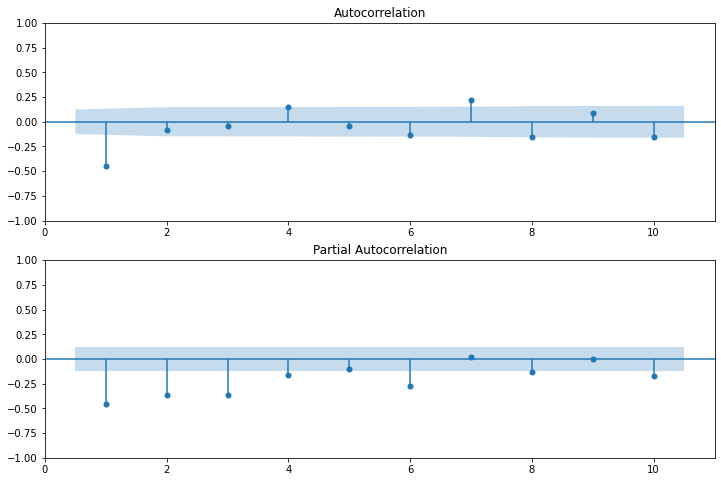

In [803]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Note: the data MUST be stationary before plotting the acf and pacf functions.
# The lags are of any option depending on how many lags you want to see. 

# Create Figure
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
#plot_acf(timeseries_dataframe, lags=10, zero=False, ax=ax1)
#plot_pacf(timeseries_dataframe, lags=10, zero=False, ax=ax2)

# Here's an example:

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

#Plot ACF and PACF
plot_acf(Extracted_Data_Stationary_diff2, lags=10, zero=False, ax=ax1)
plot_pacf(Extracted_Data_Stationary_diff2, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# If data is not stationary, the autocorrelation datapoints will be very high and tail off very slowly
# If order of difference in the data is too high, the autocorrelation point at 1st lag point (along x-axis) will be very negative.

# To determine your p and q value - refer to table on acf and pacf cutoff/tail off rules.

# Case 1: If Autocorrelation tails off with increasing lag and partial autocorrelation cuts off at lag p then this is an ar(p) model.
# Case 2: If Autocorrelation cuts off at lag q and the amplitude of partial autocorrelation tails off with increasing lag, then it's an ma(q) model.
# Case 3: If both tail off, then it's an arma(p, q) model.
# Case 4: If Autocorrelation tails off very slowly and the partial autocorrelation cuts off, then data is not stationary.
# Case 5: If Autocorrelation and partial autocorrelation coefficients are within blue (statistical insignificant) region, p and q high values.

We can see case 1 definitely applies here.  Case 2 also applies here since the autocorrelation cuts off at 2 and the partial autocorrelation tails off with increasing lag.  In this scenario I'll start with an ARMA(p, q) model.  In terms of identifying p and q values here it looks like the autocorrelation cuts off at 2 indicating that p = 2 and the partial autocorrelation tails off at p = 5.

In [804]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [805]:
# The lower the value, the better the model.  AIC good at prediction, BIC good at explanation.

order_aic_bic = []
#Looping over AR order:
for p in range(10):
#Looping over MA order
    for q in range(10):
        try:
            model = SARIMAX(train, order = (p, 2, q)) # 2 because it's a second order difference.
            results = model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            print(p, q, None, None)  # These are for bad models that will throw a ValueError if bad p and q values used to fit model.
Order_df = pd.DataFrame(order_aic_bic, columns = ['p', 'q', 'aic', 'bic'])   # turning the results into dataframe

print(Order_df.sort_values('aic')) # predictability
print(Order_df.sort_values('bic')) # explainability

    p  q          aic          bic
26  2  6  1494.602350  1526.223209
53  5  3  1495.841356  1527.462215
36  3  6  1496.287901  1531.422189
27  2  7  1496.397350  1531.531637
29  2  9  1497.032232  1539.193377
.. .. ..          ...          ...
40  4  0  1531.427467  1548.994611
30  3  0  1535.417139  1549.470854
20  2  0  1568.107403  1578.647689
10  1  0  1599.580406  1606.607263
0   0  0  1654.203445  1657.716874

[100 rows x 4 columns]
    p  q          aic          bic
1   0  1  1499.313259  1506.340117
2   0  2  1500.972328  1511.512614
11  1  1  1501.013160  1511.553446
12  1  2  1502.099650  1516.153365
21  2  1  1502.116635  1516.170350
.. .. ..          ...          ...
89  8  9  1501.785425  1565.027142
99  9  9  1501.581520  1568.336667
20  2  0  1568.107403  1578.647689
10  1  0  1599.580406  1606.607263
0   0  0  1654.203445  1657.716874

[100 rows x 4 columns]


According to the AIC/BIC values (placing priority on predictability), the best scores go here when p = 2 and q = 6.  O but can used other near best models incase the chosen one doesn't pass the remaining tests.

### Chosen Model

In [806]:
model = SARIMAX(train, order=(2, 2, 6), trend='c')
results_model = model.fit()

In [807]:
results_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  250
Model:               SARIMAX(2, 2, 6)   Log Likelihood                -737.189
Date:                Sat, 01 Jun 2024   AIC                           1494.378
Time:                        16:30:13   BIC                           1529.512
Sample:                             0   HQIC                          1508.522
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0226      0.016      1.426      0.154      -0.008       0.054
ar.L1         -1.3499      0.160     -8.448      0.000      -1.663      -1.037
ar.L2         -0.5936      0.173     -3.433      0.001      -0.933      -0.255
ma.L1          0.4260      0.480      0.887      0.375      -0.516       1.368
ma.L2         -0.7950      0.626     -1.271      0.204      -2.021       0.431
ma.L3         -0.7022      0.329     -2.132      0.033      -1.348      -0.057
ma.L4          0.1584      0.086      1.838      0.066      -0.011       0.327
ma.L5          0.1006      0.072      1.388      0.165      -0.041       0.243
ma.L6         -0.1857      0.111     -1.671      0.095      -0.404       0.032
sigma2        21.8220      9.598      2.274      0.023       3.010      40.634
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               230.63
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Using residuals to diagnose the quality of the model

Mean Absolute Error 4.880692690680151


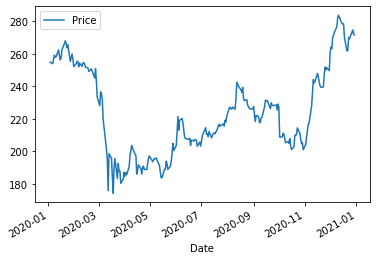

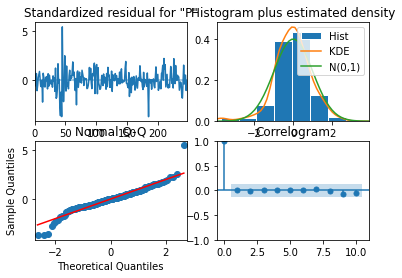

In [808]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results_model.resid))

# Print mean absolute error
print('Mean Absolute Error {}'.format(mae))

# Make plot of time series for comparison
train.plot()
plt.show()

# Can also use plot_diagnostics to check the quality of the model:

# Create the 4 diagostics plots
results_model.plot_diagnostics()
plt.savefig('Stationarity Verification')
plt.show()

These results look excellent.  The autocorrelation residuals are stationary, normally distributed and the autocorrelation diagram confirms p = 2

# Predictions

### One step ahead predictions

In [809]:
forecast_one_step_ahead= results_model.get_prediction(start=-25)
mean_forecast_one_step_ahead = forecast_one_step_ahead.predicted_mean
mean_forecast_one_step_ahead = pd.DataFrame(mean_forecast_one_step_ahead)
mean_forecast_one_step_ahead.head()

,predicted_mean
Date,
2020-11-26,251.613668
2020-11-27,251.145028
2020-11-30,253.370869
2020-12-01,250.462077
2020-12-02,262.278734


In [810]:
confidence_intervals=forecast_one_step_ahead.conf_int()
lower = confidence_intervals.loc[:, 'lower Price']
upper = confidence_intervals.loc[:, 'upper Price']
confidence_intervals.head()

,lower Price,upper Price
Date,,
2020-11-26,242.440076,260.787260
2020-11-27,241.971525,260.318530
2020-11-30,244.197455,262.544282
2020-12-01,241.288751,259.635402
2020-12-02,253.105496,271.451972


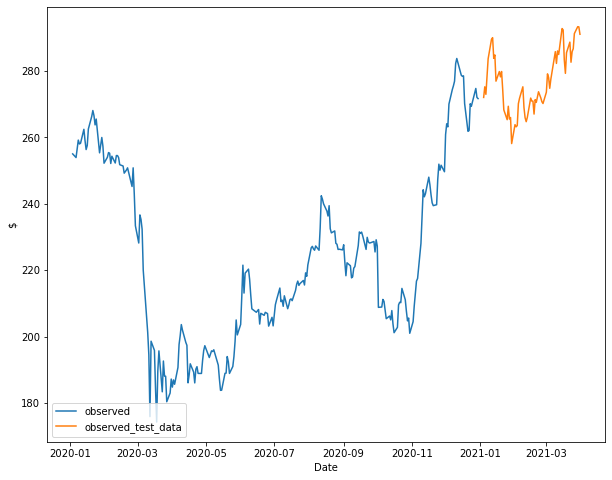

In [811]:
plt.figure(figsize=(10, 8))
plt.plot(train['Price'], label='observed')
plt.plot(test['Price'], label='observed_test_data')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='lower left')
plt.show()

As mentioned above, a there is a clearer observation of the gap between the training data and the testing data.  Although holidays and weekends are not observed.  The training and testing data do not exhibit these gaps because the plots will fill in the remaining dates as an approximation.

## Visualization of One Step Ahead Prediction

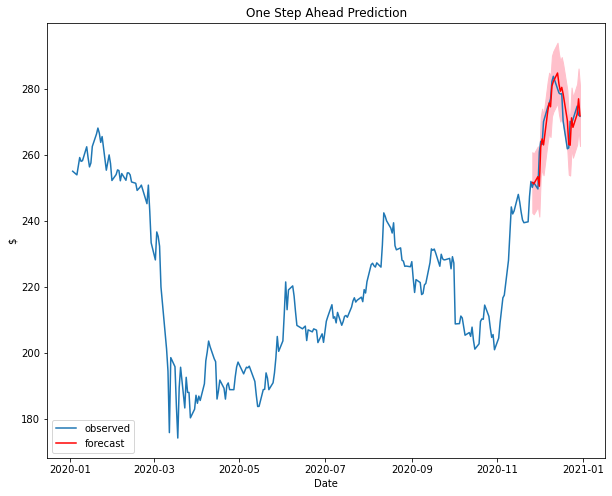

In [812]:
plt.figure(figsize=(10, 8))
plt.plot(train['Price'], label='observed')
plt.plot(mean_forecast_one_step_ahead, color='r', label = 'forecast')
plt.fill_between(lower.index, upper, lower, color='pink')
plt.title('One Step Ahead Prediction')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='lower left')
plt.show()

The above graph is the training data with the last 25 days under a red graph called a one-step-ahead prediction, which predicts the next datapoint one step ahead with 95% confidence intervals.  A one step ahead prediction is a useful way of predicting the next datapoint with accuracy.  However, the liability with a one step ahead prediction is that if there is a gap between the training and testing data, a one step ahead prediction is difficult to work with in predicting 5 days ahead and cannot be meaningful in predicting the next day when there is no datapoint in the testing data to evaluate the accuracy of the next datapoint from the one step ahead prediction.

# Making dynamic predictions - longer term forecasting

In [813]:
forecast_dynamic= results_model.get_prediction(start=-30, dynamic=True)

In [814]:
mean_forecast_dynamic = pd.DataFrame(forecast_dynamic.predicted_mean)
mean_forecast_dynamic

,predicted_mean
Date,
2020-11-19,242.309389
2020-11-20,245.096853
2020-11-23,244.435932
2020-11-24,245.125169
2020-11-25,246.285022
2020-11-26,246.718925
2020-11-27,247.876018
2020-11-30,248.510464
2020-12-01,249.443727


In [815]:
mean_forecast_dynamic.tail()

,predicted_mean
Date,
2020-12-24,265.021481
2020-12-25,266.006501
2020-12-28,267.000932
2020-12-29,268.002814
2020-12-30,269.011671


Dynamic predictions is another way of prediction data including the first datapoint of the testing data.  This circumvents the problem as discussed from the one step ahead prediction.

In [816]:
confidence_intervals=forecast_dynamic.conf_int()
lower_dynamic = confidence_intervals.loc[:, 'lower Price']
upper_dynamic = confidence_intervals.loc[:, 'upper Price']
confidence_intervals.tail()

,lower Price,upper Price
Date,,
2020-12-24,211.024276,319.018686
2020-12-25,210.845871,321.167131
2020-12-28,210.693943,323.307920
2020-12-29,210.563262,325.442366
2020-12-30,210.453861,327.569482


## Visualization of Long Term Dynamic Prediction

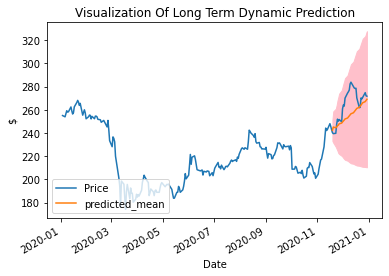

In [817]:
fig, ax = plt.subplots()
train.plot(ax=ax)
mean_forecast_dynamic.plot(ax=ax)
plt.fill_between(mean_forecast_dynamic.index, lower_dynamic, upper_dynamic, color='pink')
plt.legend(loc="lower left")
plt.title('Visualization Of Long Term Dynamic Prediction')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

# Now to predict the future

## 30 days ahead

In [818]:
forecast_future_30_days= results_model.get_forecast(steps=30)
forecast_future_30_days

In [819]:
mean_forecast_future_30_days = pd.DataFrame(forecast_future_30_days.predicted_mean)
mean_forecast_future_30_days.head()

,predicted_mean
250,273.145360
251,275.285784
252,274.608395
253,276.409221
254,277.456221


In [820]:
len(mean_forecast_future_30_days)

30

In [821]:
confidence_intervals_forecast_30_days = forecast_future_30_days.conf_int()
lower_forecast_30_days = confidence_intervals_forecast_30_days.loc[:, 'lower Price']
upper_forecast_30_days = confidence_intervals_forecast_30_days.loc[:, 'upper Price']
confidence_intervals_forecast_30_days.head()

,lower Price,upper Price
250,263.973792,282.316928
251,261.789772,288.781795
252,258.198820,291.017969
253,257.641609,295.176832
254,255.881570,299.030872


In [822]:
confidence_intervals_forecast_30_days.tail()

,lower Price,upper Price
275,247.698897,355.009503
276,247.780279,357.378979
277,247.892933,359.745008
278,248.023840,362.101097
279,248.178086,364.451347


In [823]:
len(confidence_intervals_forecast_30_days)

30

## Closer Look At 30 Day Dynamic Prediction

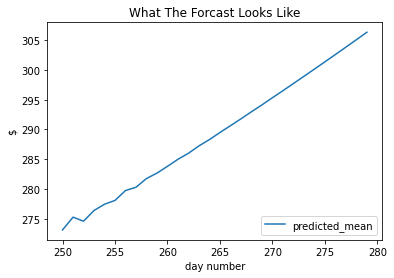

In [824]:
fig, ax = plt.subplots()
mean_forecast_future_30_days.plot(ax=ax)
plt.title("What The Forcast Looks Like")
plt.xlabel('day number')
plt.ylabel('$')
plt.legend(loc="lower right")
plt.show()

As observed, the long term forecasting of 30 days is a straight line and this is best observed as a general approximation of the last datapoint.

In [825]:
dates_30 = np.arange('2020-12-31', '2021-01-30', dtype='datetime64[D]') # 25 Days as specified by prediction
len(dates_30)

30

## Final Visual Of Future Forecast 30 days Ahead

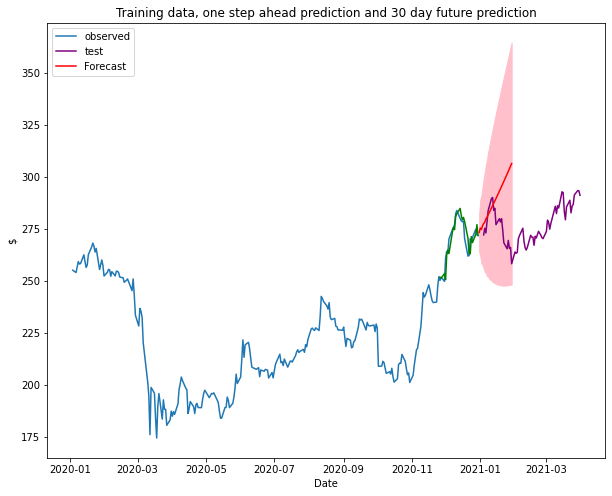

In [826]:
plt.figure(figsize=(10, 8))
plt.plot(train.index, train['Price'], label='observed')
plt.plot(test.index, test['Price'], label = 'test', color = 'purple')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['predicted_mean'], color = 'green')
plt.plot(dates_30, mean_forecast_future_30_days['predicted_mean'], color='r', label = 'Forecast')
plt.fill_between(dates_30, upper_forecast_30_days, lower_forecast_30_days, color='pink')
plt.title('Training data, one step ahead prediction and 30 day future prediction')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show() 

## 7 Days Ahead

In [827]:
forecast_future_7_days= results_model.get_forecast(steps=7)
forecast_future_7_days

In [828]:
mean_forecast_future_7_days = pd.DataFrame(forecast_future_7_days.predicted_mean)
mean_forecast_future_7_days.head()

,predicted_mean
250,273.145360
251,275.285784
252,274.608395
253,276.409221
254,277.456221


In [829]:
len(mean_forecast_future_7_days)

7

In [830]:
confidence_intervals_forecast_7_days = forecast_future_7_days.conf_int()
lower_forecast_7_days = confidence_intervals_forecast_7_days.loc[:, 'lower Price']
upper_forecast_7_days = confidence_intervals_forecast_7_days.loc[:, 'upper Price']
confidence_intervals_forecast_7_days.head()

,lower Price,upper Price
250,263.973792,282.316928
251,261.789772,288.781795
252,258.198820,291.017969
253,257.641609,295.176832
254,255.881570,299.030872


In [831]:
len(confidence_intervals_forecast_7_days)

7

## Closer Look At 7 Day Ahead Prediction

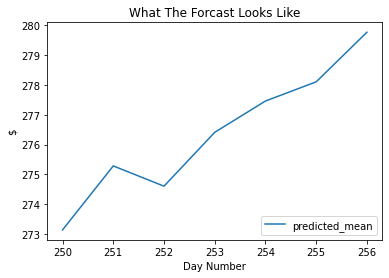

In [832]:
fig, ax = plt.subplots()
mean_forecast_future_7_days.plot(ax=ax)
plt.title("What The Forcast Looks Like")
plt.legend(loc="lower right")
plt.xlabel('Day Number')
plt.ylabel('$')
plt.show()

As observed, the prediction graph shown above is a bit more detailed than the 30 day prediction.  This is an indication the shorter term prediction may posses a bit more certainty and reliability.

In [833]:
dates_7 = np.arange('2020-12-31', '2021-01-07', dtype='datetime64[D]')
len(dates_7)

7

## Final Future Forecast 7 Day Ahead

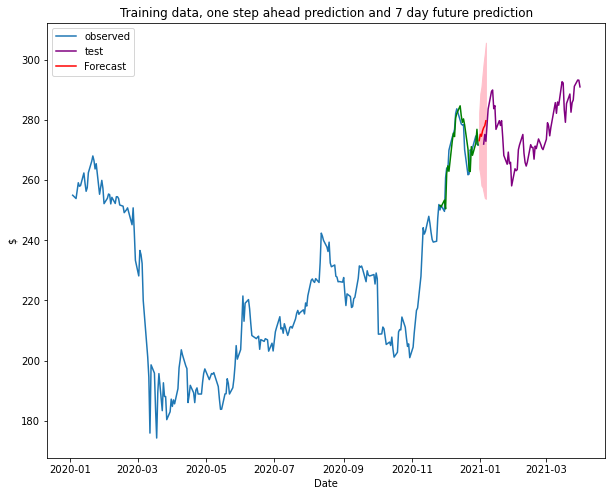

In [834]:
plt.figure(figsize=(10, 8))
plt.plot(train.index, train['Price'], label='observed')
plt.plot(test.index, test['Price'], label = 'test', color = 'purple')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['predicted_mean'], color = 'green')
plt.plot(dates_7, mean_forecast_future_7_days['predicted_mean'], color='r', label = 'Forecast')
plt.fill_between(dates_7, upper_forecast_7_days, lower_forecast_7_days, color='pink')
plt.title('Training data, one step ahead prediction and 7 day future prediction')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show() 

As observed from the graph, the shorter term predition is more of an accurate prediction in this case and proves to be a more reliable prediction.  It is also worthy to note that there is more confidence in the 7 day prediction than the 30 day prediction.

## Preparation for Boilinger Trends

### Focus On 30 Day Prediction Boilinger Trends

#### Trying A 20 Row Moving Average For 30 Day Prediction Boilinger Trend

In [835]:
Extracted_Data_1 = Data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1) # Focusing only on Price
Extracted_Data_1 = Extracted_Data.sort_index()
Extracted_Data_1.head()

,Price
Date,
2020-01-03,255.00
2020-01-06,253.90
2020-01-08,259.15
2020-01-09,257.99
2020-01-10,258.19


In [836]:
Extracted_Data_2 = Extracted_Data_1.loc['2020-03-04':'2020-05-08']
len(Extracted_Data_2)

46

In [837]:
Dates_Extracted_Data_1 = np.arange('2020-04-01', '2020-05-08', dtype='datetime64[D]') # 25 Days as specified by prediction
len(Dates_Extracted_Data_1)#'Jan 1, 2021'

37

In [838]:
# Calculate the 20-period Simple Moving Average (SMA)
Extracted_Data_1['SMA'] = Extracted_Data_1['Price'].rolling(window=20).mean()

# Calculate the 20-period Standard Deviation (SD)
Extracted_Data_1['SD'] = Extracted_Data_1['Price'].rolling(window=20).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
Extracted_Data_1['UB'] = Extracted_Data_1['SMA'] + 2 * Extracted_Data_1['SD']
Extracted_Data_1['LB'] = Extracted_Data_1['SMA'] - 2 * Extracted_Data_1['SD']

### Table Of Data For 30 Day Boilinger Trends

In [839]:
Extracted_Data_1 = Extracted_Data_1.loc['2020-01-03':'2020-02-26']
Extracted_Data_1

,Price,SMA,SD,UB,LB
Date,,,,,
2020-01-03,255.00,NaN,NaN,NaN,NaN
2020-01-06,253.90,NaN,NaN,NaN,NaN
2020-01-08,259.15,NaN,NaN,NaN,NaN
2020-01-09,257.99,NaN,NaN,NaN,NaN
2020-01-10,258.19,NaN,NaN,NaN,NaN
2020-01-13,262.40,NaN,NaN,NaN,NaN
2020-01-14,259.05,NaN,NaN,NaN,NaN
2020-01-15,256.31,NaN,NaN,NaN,NaN
2020-01-16,257.51,NaN,NaN,NaN,NaN


In [840]:
len(Extracted_Data_1)

37

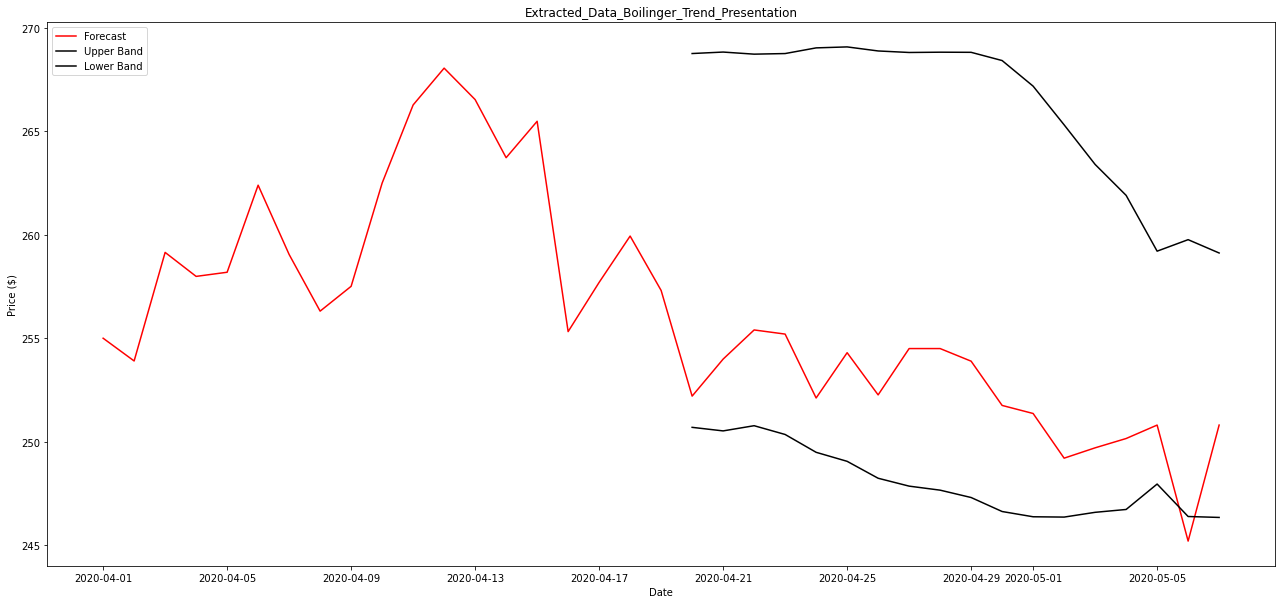

In [841]:
plt.figure(figsize=(22, 10))
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['Price'], color='r', label = 'Forecast')
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['UB'], label = 'Upper Band', color = 'black')
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['LB'], label = 'Lower Band', color = 'black')
plt.title('Extracted_Data_Boilinger_Trend_Presentation')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')
plt.show()

As observed using the extracted data as an example, the first 20 rows are NaN values due to the lag governed by the 20 row window lag.  As mentioned, for a 30 day prediction this takes away too much information.  The boilinger trend doesn't mean as much as it could.

In [842]:
dates_7 = np.arange('2020-12-31', '2021-01-07', dtype='datetime64[D]')
len(dates_7)

7

#### Trying A 5 Row Moving Average For 30 Day Prediction Boilinger Trend

In [843]:
# Calculate the 20-period Simple Moving Average (SMA)
Extracted_Data['SMA'] = Extracted_Data['Price'].rolling(window=5).mean()

# Calculate the 20-period Standard Deviation (SD)
Extracted_Data['SD'] = Extracted_Data['Price'].rolling(window=5).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
Extracted_Data['UB'] = Extracted_Data['SMA'] + 2 * Extracted_Data['SD']
Extracted_Data['LB'] = Extracted_Data['SMA'] - 2 * Extracted_Data['SD']

In [844]:
Extracted_Data.head(10)

,Price,SMA,SD,UB,LB
Date,,,,,
2020-04-01,184.78,NaN,NaN,NaN,NaN
2020-04-02,186.95,NaN,NaN,NaN,NaN
2020-04-03,185.64,NaN,NaN,NaN,NaN
2020-04-06,190.70,NaN,NaN,NaN,NaN
2020-04-07,197.63,189.140,5.257599,199.655199,178.624801
2020-04-08,200.29,192.242,6.476308,205.194617,179.289383
2020-04-09,203.61,195.574,7.305568,210.185137,180.962863
2020-04-10,201.99,198.844,5.062152,208.968303,188.719697
2020-04-13,198.26,200.356,2.504352,205.364704,195.347296


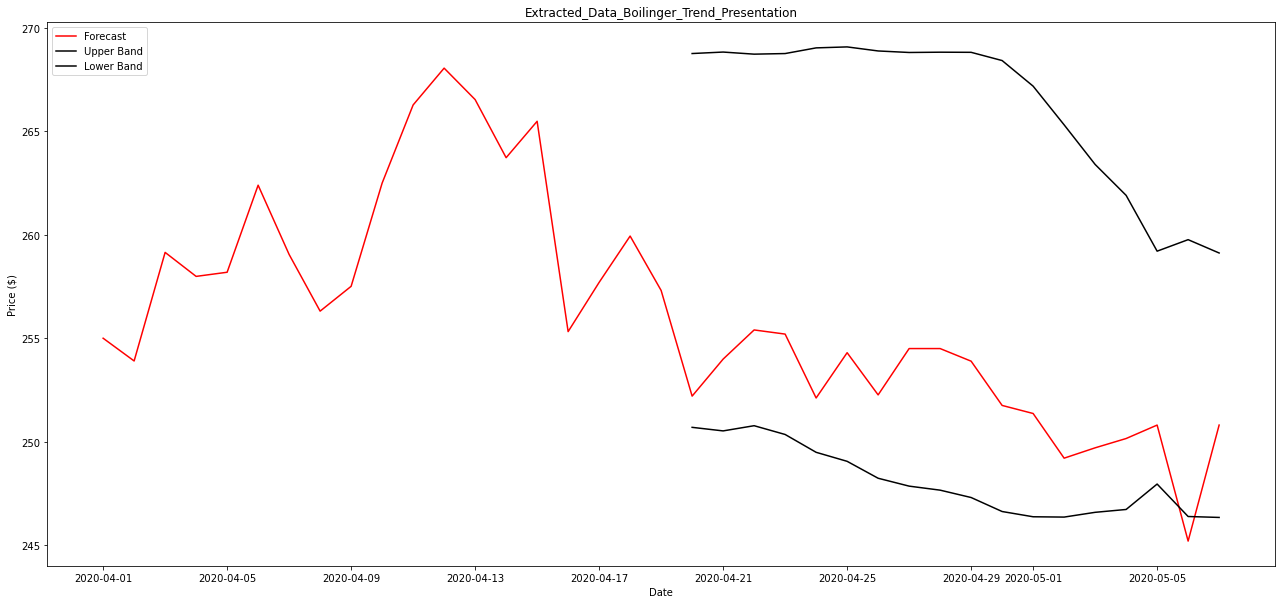

In [845]:
plt.figure(figsize=(22, 10))
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['Price'], color='r', label = 'Forecast')
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['UB'], label = 'Upper Band', color = 'black')
plt.plot(Dates_Extracted_Data_1, Extracted_Data_1['LB'], label = 'Lower Band', color = 'black')
plt.title('Extracted_Data_Boilinger_Trend_Presentation')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')
plt.show()

As observed the lag is only a five row window, which takes away less information giving the boilinger trends a more reasonable presentation.  The origional data was used to pose a demonstration of boilinger trends and is applied to predictions as seen below.

In [846]:
# Calculate the 20-period Simple Moving Average (SMA)
mean_forecast_future_30_days['SMA'] = mean_forecast_future_30_days['predicted_mean'].rolling(window=5).mean()

# Calculate the 20-period Standard Deviation (SD)
mean_forecast_future_30_days['SD'] = mean_forecast_future_30_days['predicted_mean'].rolling(window=5).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
mean_forecast_future_30_days['UB'] = mean_forecast_future_30_days['SMA'] + 2 * mean_forecast_future_30_days['SD']
mean_forecast_future_30_days['LB'] = mean_forecast_future_30_days['SMA'] - 2 * mean_forecast_future_30_days['SD']

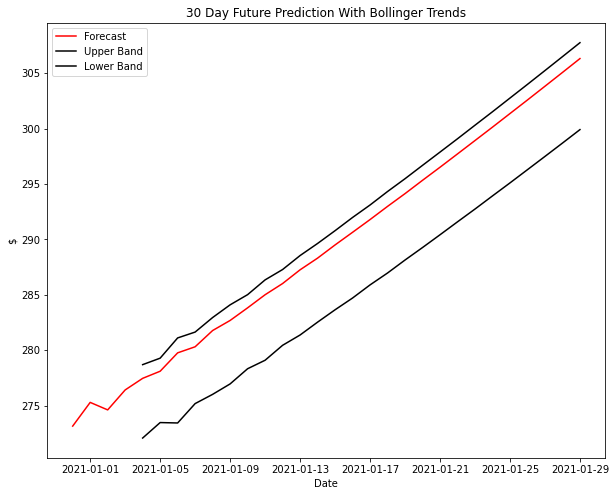

In [848]:
plt.figure(figsize=(10, 8))
plt.plot(dates_30, mean_forecast_future_30_days['predicted_mean'], color='r', label = 'Forecast')
plt.plot(dates_30, mean_forecast_future_30_days['UB'], label = 'Upper Band', color = 'black')
plt.plot(dates_30, mean_forecast_future_30_days['LB'], label = 'Lower Band', color = 'black')
plt.title('30 Day Future Prediction With Bollinger Trends')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show() 

The boilinger trends for the 30 day prediction are straight lines.  This is typical of a straight line graph and the best one can take from this is the approximations of the intervals of the last datapoint.

In [849]:
# Calculate the 20-period Simple Moving Average (SMA)
mean_forecast_future_7_days['SMA'] = mean_forecast_future_7_days['predicted_mean'].rolling(window=3).mean()

# Calculate the 20-period Standard Deviation (SD)
mean_forecast_future_7_days['SD'] = mean_forecast_future_7_days['predicted_mean'].rolling(window=3).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
mean_forecast_future_7_days['UB'] = mean_forecast_future_7_days['SMA'] + 2 * mean_forecast_future_7_days['SD']
mean_forecast_future_7_days['LB'] = mean_forecast_future_7_days['SMA'] - 2 * mean_forecast_future_7_days['SD']

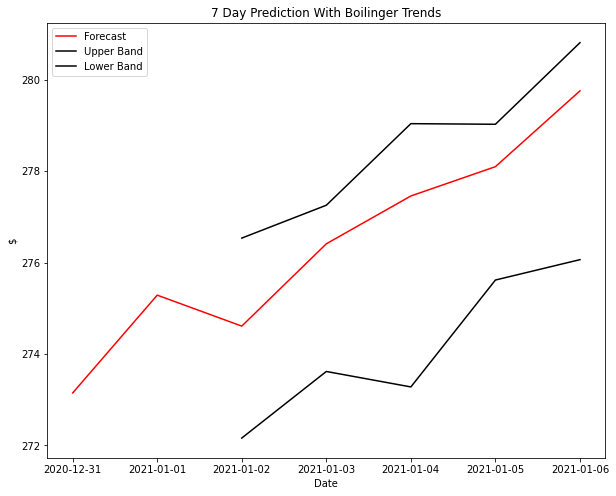

In [850]:
plt.figure(figsize=(10, 8))
plt.plot(dates_7, mean_forecast_future_7_days['predicted_mean'], color='r', label = 'Forecast')
plt.plot(dates_7, mean_forecast_future_7_days['UB'], label = 'Upper Band', color = 'black')
plt.plot(dates_7, mean_forecast_future_7_days['LB'], label = 'Lower Band', color = 'black')
plt.title('7 Day Prediction With Boilinger Trends')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show() 

Here the boilinger trends for a 7 day prediction show more detail.

In [851]:
# Calculate the 20-period Simple Moving Average (SMA)
mean_forecast_one_step_ahead['SMA'] = mean_forecast_one_step_ahead['predicted_mean'].rolling(window=3).mean()

# Calculate the 20-period Standard Deviation (SD)
mean_forecast_one_step_ahead['SD'] = mean_forecast_one_step_ahead['predicted_mean'].rolling(window=3).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
mean_forecast_one_step_ahead['UB'] = mean_forecast_one_step_ahead['SMA'] + 2 * mean_forecast_one_step_ahead['SD']
mean_forecast_one_step_ahead['LB'] = mean_forecast_one_step_ahead['SMA'] - 2 * mean_forecast_one_step_ahead['SD']

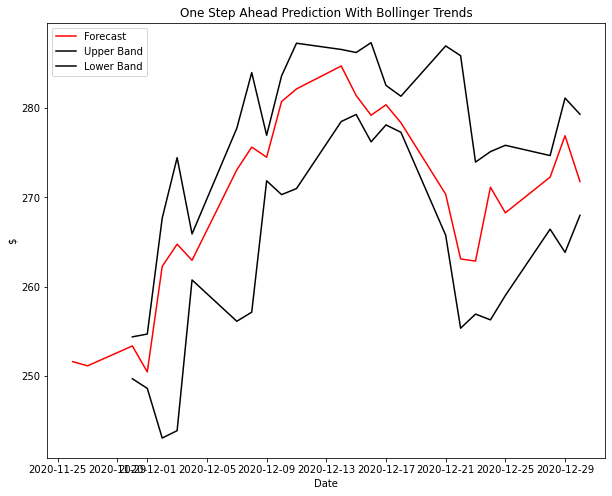

In [852]:
plt.figure(figsize=(10, 8))
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['predicted_mean'], color='r', label = 'Forecast')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['UB'], label = 'Upper Band', color = 'black')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['LB'], label = 'Lower Band', color = 'black')
plt.title('One Step Ahead Prediction With Bollinger Trends')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show()

One step ahead is great for 1 day ahead predictions, but since the next trading day is on January 4, 2021 the one step ahead prediction cannot predict any further than December 31, 2020 and this is a holiday period.  Therefore the one step ahead prediction has to be discarded.  It is however interesting to note that the boilinger trends for a one step prediction entails more detail.  It is also worth mentioning that the boilinger trends exhibit a lag at the beginning of the graph.  This is neccessary as part of the calculation of the moving average defining the boilinger trends.

## Metrics To Evaluate Overall Accuracy Of Model

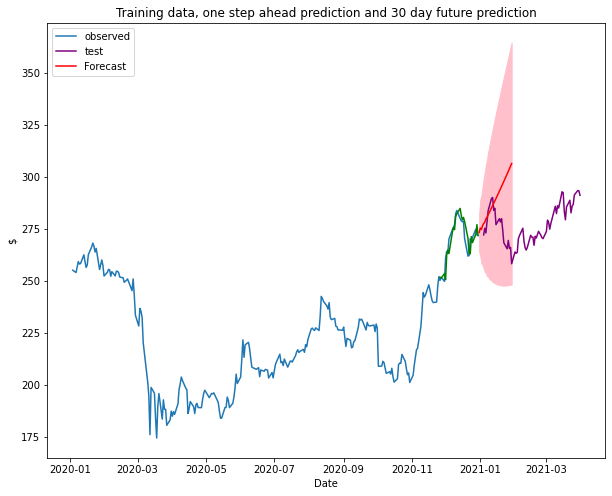

In [853]:
plt.figure(figsize=(10, 8))
plt.plot(train.index, train['Price'], label='observed')
plt.plot(test.index, test['Price'], label = 'test', color = 'purple')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead['predicted_mean'], color = 'green')
plt.plot(dates_30, mean_forecast_future_30_days['predicted_mean'], color='r', label = 'Forecast')
plt.fill_between(dates_30, upper_forecast_30_days, lower_forecast_30_days, color='pink')
plt.title('Training data, one step ahead prediction and 30 day future prediction')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show()

In [854]:
test[:30]

,Price
Date,
2021-01-04,272.00
2021-01-05,275.20
2021-01-06,272.93
2021-01-08,283.64
2021-01-11,289.49
2021-01-12,289.99
2021-01-13,283.78
2021-01-14,284.79
2021-01-15,276.90


In [855]:
mean_forecast_future_30_days['predicted_mean'].iloc[-1]

306.31471658141584

In [856]:
test[:30].iloc[-1] = test[:30].iloc[-1].astype('float64')
test[:30].iloc[-1]

Price    271.81
Name: 2021-02-15 00:00:00, dtype: float64

In [857]:
mean_forecast_future_30_days['predicted_mean'] - test[:31].iloc[-1]['Price']

250     2.245360
251     4.385784
252     3.708395
253     5.509221
254     6.556221
255     7.197507
256     8.856586
257     9.405232
258    10.871248
259    11.780742
260    12.919506
261    14.101779
262    15.111835
263    16.351155
264    17.405851
265    18.596288
266    19.735712
267    20.886036
268    22.074550
269    23.227661
270    24.428511
271    25.608556
272    26.810966
273    28.018157
274    29.228238
275    30.454200
276    31.679629
277    32.918970
278    34.162468
279    35.414717
Name: predicted_mean, dtype: float64

In [858]:
difference_30_days = pd.DataFrame(mean_forecast_future_30_days['predicted_mean'] - test[:31].iloc[-1]['Price'])
difference_30_days

,predicted_mean
250,2.245360
251,4.385784
252,3.708395
253,5.509221
254,6.556221
255,7.197507
256,8.856586
257,9.405232
258,10.871248
259,11.780742


In [859]:
difference_30_days.index = dates_30
difference_30_days

,predicted_mean
2020-12-31,2.245360
2021-01-01,4.385784
2021-01-02,3.708395
2021-01-03,5.509221
2021-01-04,6.556221
2021-01-05,7.197507
2021-01-06,8.856586
2021-01-07,9.405232
2021-01-08,10.871248
2021-01-09,11.780742


In [860]:
difference_30_days.rename(columns = {'predicted_mean':'30_day_difference'}, inplace = True)
difference_30_days

,30_day_difference
2020-12-31,2.245360
2021-01-01,4.385784
2021-01-02,3.708395
2021-01-03,5.509221
2021-01-04,6.556221
2021-01-05,7.197507
2021-01-06,8.856586
2021-01-07,9.405232
2021-01-08,10.871248
2021-01-09,11.780742


In [861]:
final_difference_on_30_day = difference_30_days.iloc[-1]
final_difference_on_30_day

30_day_difference    35.414717
Name: 2021-01-29 00:00:00, dtype: float64

The metrics used here is the dollar value difference between the test dollar value on the 30th day and the predicted value on the 30th day.  This means that the true value is 34.50 dollars lower than the predicted value.  So if you bought 1 share on the last day of the date of the last day on the training data, you would loose 34.50 dollars per share if you sold 30 days afterwards.

In [862]:
mean_forecast_future_7_days['predicted_mean'] = pd.DataFrame(mean_forecast_future_7_days['predicted_mean'])
mean_forecast_future_7_days.index = dates_7
mean_forecast_future_7_days

,predicted_mean,SMA,SD,UB,LB
2020-12-31,273.145360,NaN,NaN,NaN,NaN
2021-01-01,275.285784,NaN,NaN,NaN,NaN
2021-01-02,274.608395,274.346513,1.093979,276.534470,272.158555
2021-01-03,276.409221,275.434466,0.909573,277.253613,273.615320
2021-01-04,277.456221,276.157945,1.440445,279.038836,273.277055
2021-01-05,278.097507,277.320983,0.852229,279.025442,275.616524
2021-01-06,279.756586,278.436771,1.187116,280.811004,276.062539


In [863]:
difference_7_days = pd.DataFrame(mean_forecast_future_7_days['predicted_mean'] - test[:8].iloc[-1]['Price'])
difference_7_days

,predicted_mean
2020-12-31,-11.644640
2021-01-01,-9.504216
2021-01-02,-10.181605
2021-01-03,-8.380779
2021-01-04,-7.333779
2021-01-05,-6.692493
2021-01-06,-5.033414


In [864]:
final_difference_on_7_day = difference_7_days.iloc[-1]
final_difference_on_7_day

predicted_mean   -5.033414
Name: 2021-01-06 00:00:00, dtype: float64

The metrics used here is the dollar value difference between the test dollar value on the 7th day and the predicted value on the 7th day.  This means that the true value is 5.03 dollars higher than the predicted value.  So if you bought 1 share on the last day of the date of the last day on the training data, you would gain 5.03 dollars per share if you sold 7 days afterwards.

In [865]:
test.iloc[0]

Price    272.0
Name: 2021-01-04 00:00:00, dtype: float64

In [866]:
difference_30_days.iloc[4]

30_day_difference    6.556221
Name: 2021-01-04 00:00:00, dtype: float64

The metrics used here is the dollar value difference between the test dollar value on the 1st day and the predicted value on the next day.  This means that the true value is 6.56 dollars lower than the predicted value.  So if you bought 1 share on the last day of the date of the last day on the training data, you would loose 6.56 dollars per share if you sold 1 day afterwards.

## Buy, Sell Or Hold

### 30 Day Period

In [867]:
mean_forecast_future_30_days.index = dates_30

In [868]:
mean_forecast_future_30_days

,predicted_mean,SMA,SD,UB,LB
2020-12-31,273.145360,NaN,NaN,NaN,NaN
2021-01-01,275.285784,NaN,NaN,NaN,NaN
2021-01-02,274.608395,NaN,NaN,NaN,NaN
2021-01-03,276.409221,NaN,NaN,NaN,NaN
2021-01-04,277.456221,275.380996,1.655887,278.692771,272.069221
2021-01-05,278.097507,276.371425,1.452968,279.277362,273.465489
2021-01-06,279.756586,277.265586,1.918824,281.103234,273.427938
2021-01-07,280.305232,278.404953,1.613655,281.632264,275.177643
2021-01-08,281.771248,279.477359,1.733080,282.943518,276.011200
2021-01-09,282.680742,280.522263,1.784082,284.090428,276.954098


In [869]:
day_30_lower_band_difference = mean_forecast_future_30_days['LB'].iloc[-1] - mean_forecast_future_30_days['predicted_mean'].iloc[-1]

In [870]:
day_30_lower_band_difference

-6.41119971569924

In [871]:
day_30_upper_band_difference = mean_forecast_future_30_days['UB'].iloc[-1] - mean_forecast_future_30_days['predicted_mean'].iloc[-1]

In [872]:
day_30_upper_band_difference

1.433760284816799

In [873]:
true_30_day_datapoint = test[:31].iloc[-1]['Price']

In [874]:
mean_forecast_future_30_days['predicted_mean'].iloc[-1]

306.31471658141584

In [875]:
if true_30_day_datapoint < mean_forecast_future_30_days['LB'].iloc[-1]:
    print("SELL")
elif true_30_day_datapoint < mean_forecast_future_30_days['UB'].iloc[-1]:
    print("HOLD")
else:
    print("BUY")

SELL


In [876]:
true_7_day_datapoint = test[:8].iloc[-1]['Price']

In [877]:
mean_forecast_future_7_days['predicted_mean'].iloc[-1]

279.7565858916685

In [878]:
if true_7_day_datapoint < mean_forecast_future_7_days['LB'].iloc[-1]:
    print("SELL")
elif true_7_day_datapoint < mean_forecast_future_7_days['UB'].iloc[-1]:
    print("HOLD")
else:
    print("BUY")

BUY


In [879]:
test.iloc[0]

Price    272.0
Name: 2021-01-04 00:00:00, dtype: float64

In [880]:
train.iloc[-1]

Price    271.65
Name: 2020-12-30 00:00:00, dtype: float64

The last trading day on the training dataset is on December 30, 2020 and the first trading day on the test dataset is on January 4, 2021.  This poses as a problem using one step ahead predictions since there is a 5 day gap instead of a 1 day gap.  Therefore the same test data for the long term prediction will be used to assess whether to buy, sell or hold on January 4, 2021.

In [881]:
true_1_day_datapoint = test.iloc[0]
true_1_day_datapoint

Price    272.0
Name: 2021-01-04 00:00:00, dtype: float64

In [882]:
mean_forecast_future_7_days['LB'].iloc[4]

273.27705455720337

In [883]:
mean_forecast_future_7_days['UB'].iloc[4]

279.03883639121244

In [884]:
true_1_day_datapoint = float(true_1_day_datapoint)

In [885]:
if true_1_day_datapoint < mean_forecast_future_7_days['LB'].iloc[-1]:
    print("SELL")
elif true_1_day_datapoint < mean_forecast_future_7_days['UB'].iloc[-1]:
    print("HOLD")
else:
    print("BUY")

SELL


The decision to buy, hold or sell is determined on the proximity of the first testing datapoint (what is actually going on) and the last training datapoint as neccessary to take the difference between the two.